In [18]:
from itertools import chain

import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
img1 = cv2.imread('../DATA/dog_backpack.png')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('../DATA/watermark_no_copy.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

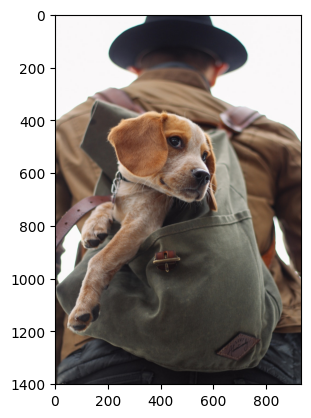

In [20]:
plt.imshow(img1)

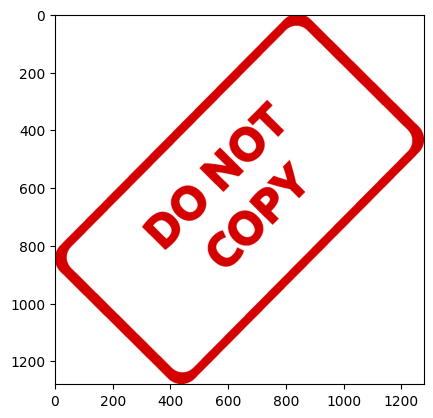

In [21]:
plt.imshow(img2)

In [22]:
img1.shape

(1401, 934, 3)

In [23]:
img2.shape

(1280, 1277, 3)

In [24]:
# BLENDING IMAGES OF THE SAME SIZE
img1 = cv2.resize(img1, (1200, 1200))
img2 = cv2.resize(img2, (1200, 1200))

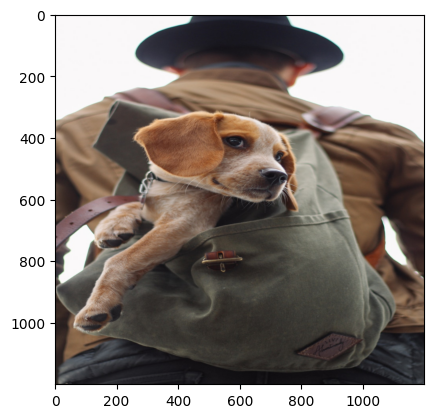

In [25]:
plt.imshow(img1)

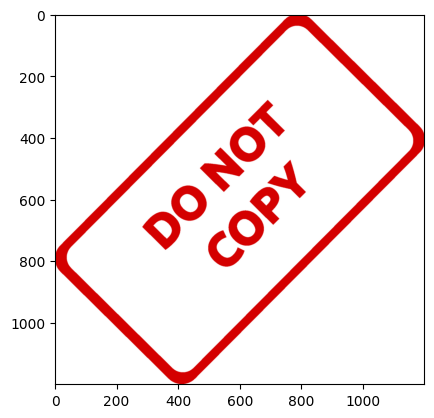

In [26]:
plt.imshow(img2)

In [27]:
blended = cv2.addWeighted(src1=img1, alpha=0.5, src2=img2, beta=0.5, gamma=0)

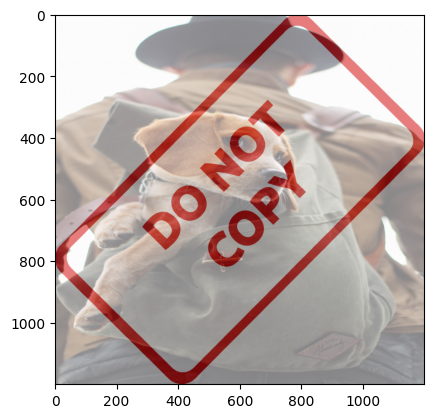

In [28]:
plt.imshow(blended)

In [29]:
# OVERLAY SMALL IMAGE ON TOP OF A LARGER IMAGE (NO BLENDING)
# Numpy reassignment
img1 = cv2.imread('../DATA/dog_backpack.png')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('../DATA/watermark_no_copy.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)


img2 = cv2.resize(img2, (600, 600))
large_img = img1
small_img = img2

In [30]:
x_offset = 0
y_offset = 0


In [24]:
x_end = x_opeffset + small_img.shape[1]
y_end = y_offset + small_img.shape[0]

In [25]:
large_img[y_offset:y_end, x_offset:y_end] = small_img

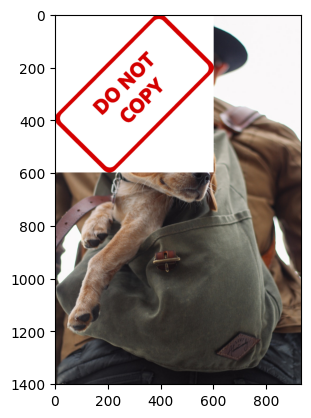

In [26]:
plt.imshow(large_img)

In [4]:
# BLEND SMALL IMAGE ON TOP OF A LARGER IMAGE (NO BLENDING)
# Numpy reassignment
img1 = cv2.imread('../DATA/dog_backpack.png')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('../DATA/watermark_no_copy.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)


img2 = cv2.resize(img2, (600, 600))

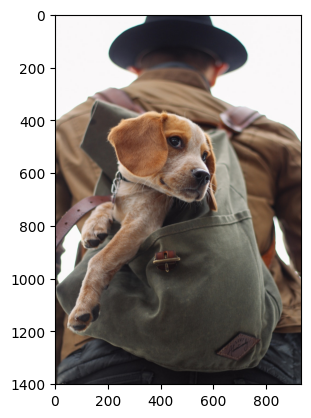

In [5]:
plt.imshow(img1)

In [6]:
img1.shape

(1401, 934, 3)

In [7]:
# calculate image offsets
x_offset = 934 - 600
y_offset = 1401 - 600


In [8]:
img2.shape

(600, 600, 3)

In [10]:
rows, cols, channels = img2.shape

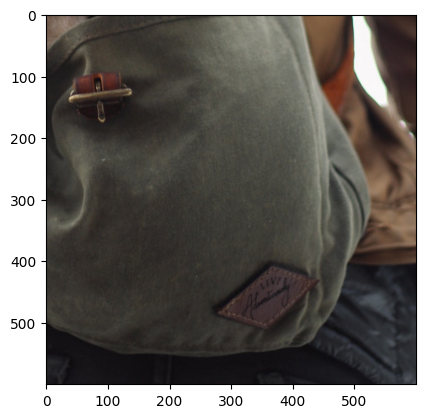

In [11]:
# regio of interes
roi = img1[y_offset:1401, x_offset:943]
plt.imshow(roi)

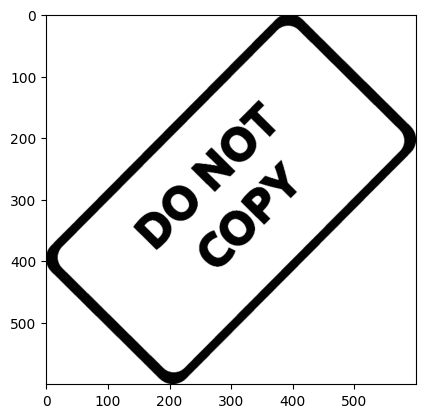

In [15]:
# calculate a mask to exclude area of copy
img2gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
plt.imshow(img2gray, cmap='gray')

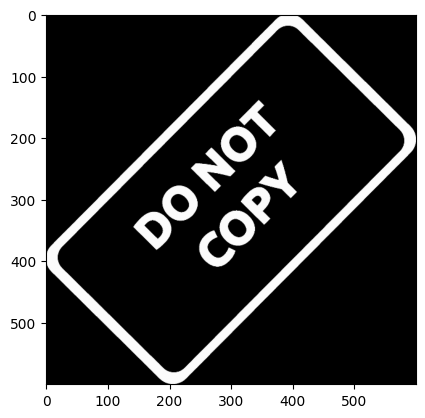

In [17]:
# but we need to oposite of this image...
mask_inv = cv2.bitwise_not(img2gray)
plt.imshow(mask_inv, cmap='gray')

In [31]:
mask_inv.shape

(600, 600)

In [32]:
import numpy as np
# add missing channels
white_background = np.full(img2.shape, 255, dtype=np.uint8)

In [33]:
white_background.shape

(600, 600, 3)

In [34]:
bk = cv2.bitwise_or(white_background, white_background, mask=mask_inv)

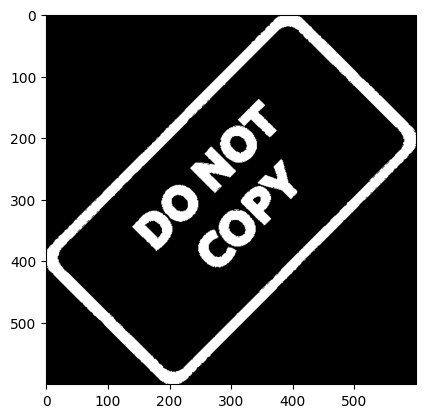

In [35]:
plt.imshow(bk)

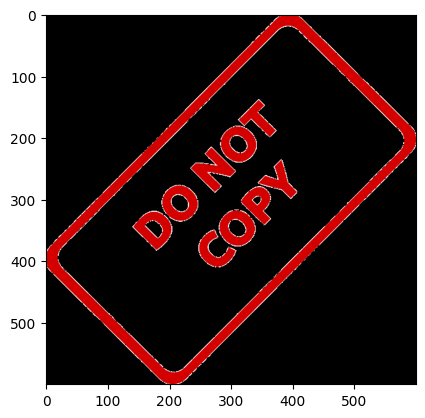

In [37]:
# add the opriginal image
fg = cv2.bitwise_or(img2, img2, mask=mask_inv)
plt.imshow(fg)

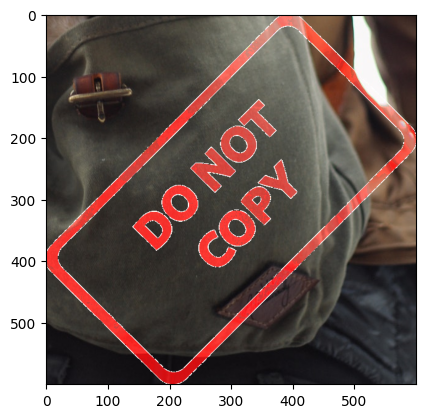

In [38]:
# finally, blend
final_roi = cv2.bitwise_or(roi,fg)
plt.imshow(final_roi)

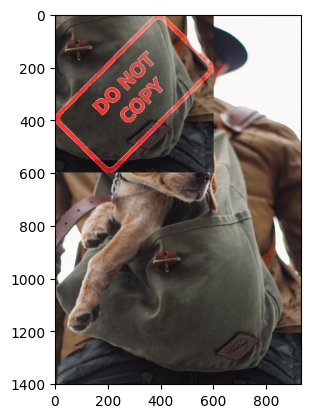

In [39]:
large_image = img1
small_img = final_roi
large_image[y_offset:y_offset+small_img.shape[0], x_offset:x_offset+small_img.shape[1]] = small_img
plt.imshow(large_image)